<a href="https://colab.research.google.com/github/Pinalli/SGBD_T2/blob/main/SGBD__T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Pinalli/SGBD_T2/main/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Frequent consumption of high caloric food (FAVC); 
Frequency of consumption of vegetables (FCVC);
Number of main meals (NCP);
Consumption of food between meals (CAEC);
Consumption of water daily (CH20);
Consumption of alcohol (CALC);
The attributes related with the physical condition are: Calories consumption monitoring (SCC);
Physical activity frequency (FAF);
Time using technology devices (TUE);
Transportation used (MTRANS)

<h3>Calculando e imprimindo histogramas sobre todas as colunas numéricas</h3>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


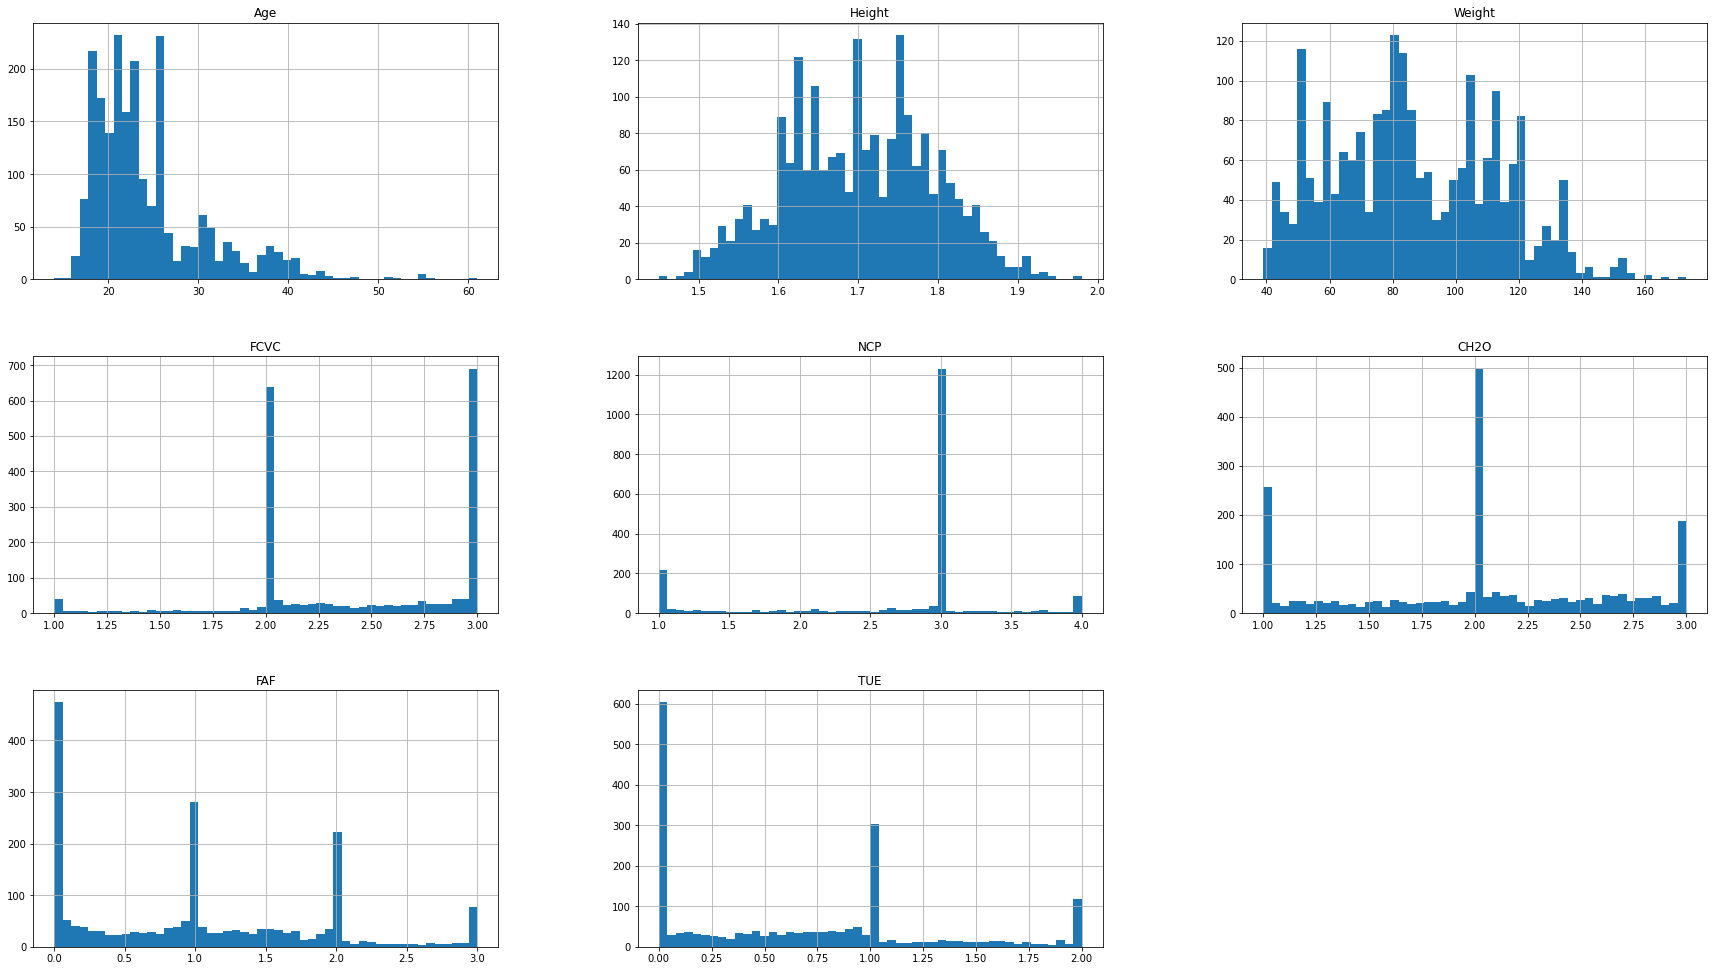

In [ ]:
# % matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize = (30,15))
plt.show()

## Analisando correlações entre colunas numéricas
### Gráficos de dispersão comparando todas as colunas entre si

In [ ]:
features = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']

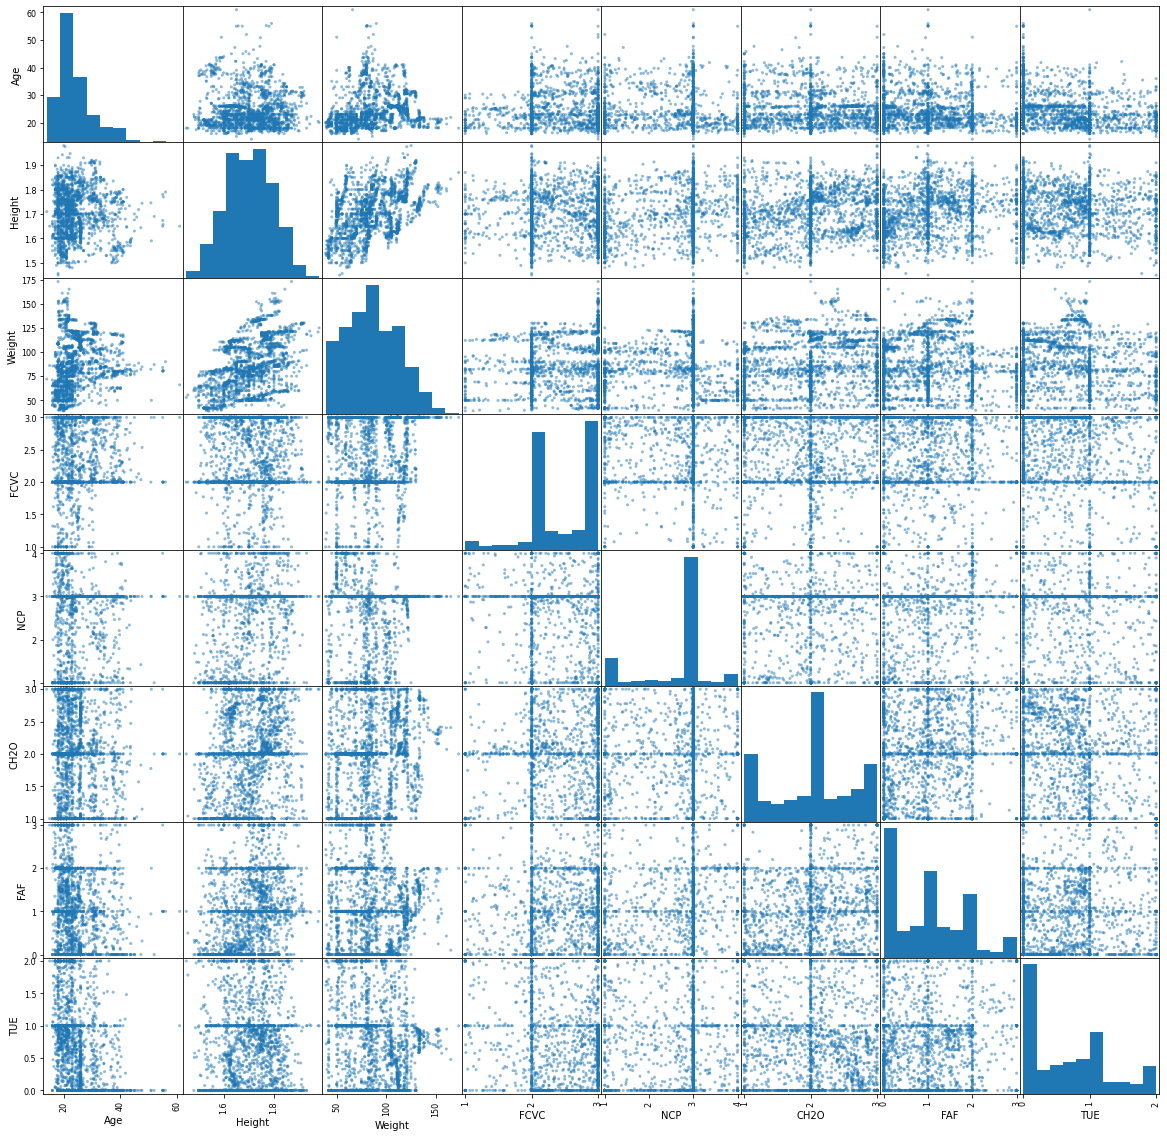

In [ ]:
pd.plotting.scatter_matrix(df[features],figsize=(20, 20))
plt.show()

In [ ]:
import scipy.stats as stats

r, p = stats.pearsonr(df['Weight'].values, df['Height'].values)
r

0.4631361166156266

### Automatizando um pouco a análise para conjuntos grandes de colunas

#### Escolhendo as colunas preditivas númericas que serão analisadas

#### Calculando uma matríz de correlações entre as colunas preditivas numéricas escolhidas



In [ ]:
num_feature_names = ['Age','Height','Weight',
                    'FCVC','NCP','CH2O','FAF','TUE']

In [ ]:
corr = np.corrcoef(df[num_feature_names],rowvar=False)
dfcorr = pd.DataFrame(corr,index=num_feature_names,columns=num_feature_names)
dfcorr

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


# Pré Processamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['NObeyesdad'].copy()
df_treino        = df_treino.drop(columns='NObeyesdad')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['NObeyesdad'].copy()
df_teste        = df_teste.drop(columns='NObeyesdad')

In [ ]:

# Atributos escolhidos:
att_num   = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

att_cat = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']

pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, att_num),
    ('categoricos', OneHotEncoder(),        att_cat),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

In [ ]:
# Coluna alvo para os conjuntos de treino e teste
y_treino = df_treino_labels.values
y_teste = df_teste_labels.values

In [ ]:
y_treino

array(['Normal_Weight', 'Obesity_Type_III', 'Obesity_Type_I', ...,
       'Overweight_Level_II', 'Obesity_Type_I', 'Overweight_Level_I'],
      dtype=object)

# Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)

log_reg.fit(X_treino, y_treino)
log_reg.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

## Estimação

In [ ]:
y_probabilidade = log_reg.predict_proba(X_teste)
np.round(y_probabilidade,decimals=2)

array([[0.92, 0.08, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.99, 0.  , 0.  ],
       [0.86, 0.11, 0.  , ..., 0.  , 0.03, 0.  ],
       ...,
       [0.68, 0.21, 0.  , ..., 0.  , 0.11, 0.  ],
       [0.  , 0.  , 0.21, ..., 0.  , 0.  , 0.01],
       [0.  , 0.05, 0.01, ..., 0.  , 0.03, 0.9 ]])

## Previsão

In [ ]:
y_previsto = log_reg.predict(X_teste)

In [ ]:
y_teste, y_teste.shape

(array(['Insufficient_Weight', 'Obesity_Type_III', 'Insufficient_Weight',
        'Insufficient_Weight', 'Normal_Weight', 'Insufficient_Weight',
        'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I',
        'Insufficient_Weight', 'Obesity_Type_I', 'Obesity_Type_III',
        'Obesity_Type_II', 'Obesity_Type_II', 'Obesity_Type_III',
        'Overweight_Level_II', 'Obesity_Type_III', 'Obesity_Type_II',
        'Obesity_Type_I', 'Overweight_Level_II', 'Obesity_Type_I',
        'Overweight_Level_I', 'Obesity_Type_III', 'Obesity_Type_I',
        'Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_II',
        'Obesity_Type_III', 'Obesity_Type_III', 'Insufficient_Weight',
        'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II',
        'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III',
        'Obesity_Type_I', 'Normal_Weight', 'Normal_Weight',
        'Normal_Weight', 'Normal_Weight', 'Obesity_Type_II',
        'Normal_Weight', 'Normal_Weight', 'O

In [ ]:
acertos = y_previsto == y_teste
acertos

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,

In [ ]:
valores, quantidades = np.unique(acertos, return_counts=True)
print(np.asarray((valores, quantidades)))

[[  0   1]
 [ 54 369]]


In [ ]:
print("Acurácia: ", quantidades[1]/y_teste.shape[0])

Acurácia:  0.8723404255319149


# Árvore de Decisão (com pré processamento)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier()
arvore.fit(X_treino, y_treino)
arvore.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

## Estimação

In [ ]:
y_probabilidade_arvore = arvore.predict_proba(X_teste)
np.round(y_probabilidade_arvore,decimals=2)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Previsão e Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

y_previsto_arvore = arvore.predict(X_teste)
acertos_arvore = y_previsto_arvore == y_teste
valores_arvore, quantidades_arvore = np.unique(acertos_arvore, return_counts=True)
print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore))

Acurácia:  0.9456264775413712


## Visualização da Árvore de Decisão

In [ ]:
nomes_att = np.append( att_num, preproc_completo.named_transformers_['categoricos'].get_feature_names())

[Text(732.375, 597.96, 'Weight <= 0.497\ngini = 0.856\nsamples = 100.0%\nvalue = [0.128, 0.133, 0.162, 0.142, 0.155, 0.139, 0.142]\nclass = Obesity_Type_I'),
 Text(446.40000000000003, 489.24, 'Weight <= -1.017\ngini = 0.801\nsamples = 65.6%\nvalue = [0.195, 0.203, 0.173, 0.005, 0.0, 0.211, 0.213]\nclass = Overweight_Level_II'),
 Text(223.20000000000002, 380.52000000000004, 'Height <= -0.444\ngini = 0.479\nsamples = 19.7%\nvalue = [0.637, 0.339, 0.0, 0.0, 0.0, 0.021, 0.003]\nclass = Insufficient_Weight'),
 Text(111.60000000000001, 271.8, 'Weight <= -1.524\ngini = 0.531\nsamples = 10.5%\nvalue = [0.401, 0.554, 0.0, 0.0, 0.0, 0.04, 0.006]\nclass = Normal_Weight'),
 Text(55.800000000000004, 163.07999999999998, 'Weight <= -1.596\ngini = 0.131\nsamples = 4.2%\nvalue = [0.93, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0]\nclass = Insufficient_Weight'),
 Text(27.900000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3.4%\nvalue = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]\nclass = Insufficient_Weight'),
 Text(

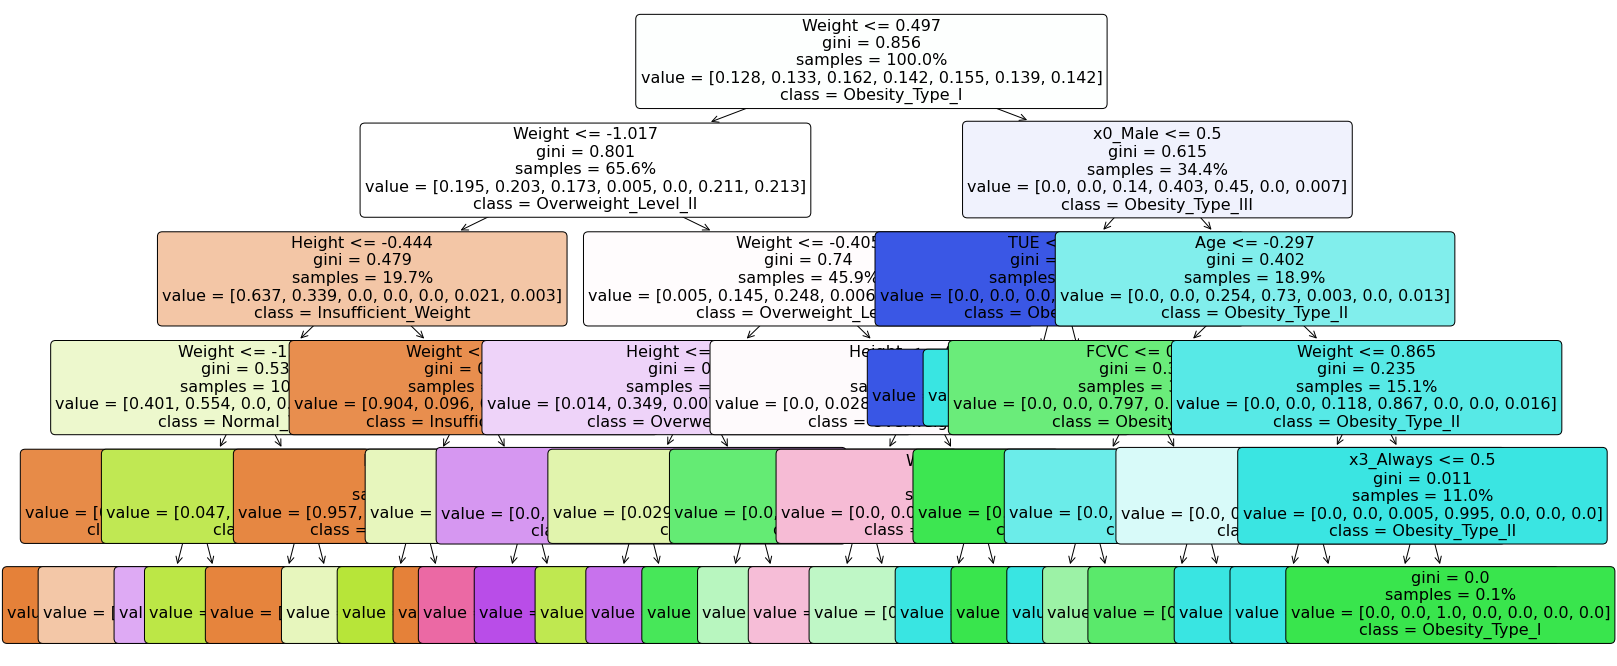

In [ ]:
from sklearn import tree

plt.figure(figsize=(24,12))

tree.plot_tree(arvore,
               feature_names=nomes_att,
               class_names=arvore.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=16)

# Árvore de Decisão (sem pré processamento)

In [ ]:
preproc_completo_2 = ColumnTransformer([
    ('numericos',   'passthrough',    att_num),
    ('categoricos', OneHotEncoder(),  att_cat),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino_tree = preproc_completo_2.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste_tree = preproc_completo_2.transform(df_teste)

In [ ]:
arvore_2 = DecisionTreeClassifier()
arvore_2.fit(X_treino_tree, y_treino)
arvore_2.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [ ]:
y_probabilidade_arvore_2 = arvore_2.predict_proba(X_teste_tree)
np.round(y_probabilidade_arvore_2,decimals=2)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
y_previsto_arvore_2 = arvore_2.predict(X_teste_tree)

In [ ]:
acertos_arvore_2 = y_previsto_arvore_2 == y_teste

In [ ]:
valores_arvore_2, quantidades_arvore_2 = np.unique(acertos_arvore_2, return_counts=True)
print(np.asarray((valores_arvore_2, quantidades_arvore_2)))

[[  0   1]
 [ 21 402]]


In [ ]:
print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore_2))

Acurácia:  0.950354609929078
